# 🎵 Music Features & Lyrics Analysis
**Student:** Betül Eken  34378

**Course:** DSA210 - Introduction to Data Science

---

### 🚀 Welcome to My Analysis
Music is more than just sound—it's a combination of acoustic vibrations and linguistic meaning. In this project, I explore the connection between **what we hear** (Audio Features like Energy, Valence) and **what we read** (Lyrical Complexity).

### 🧩 Notebook Overview
This notebook follows a structured data science pipeline:

1.  **📥 Data Loading**: Importing Spotify audio metrics and raw lyrics.
2.  **🔗 Merging & Cleaning**: Creating a unified dataset of **1,700+ songs**.
3.  **📝 NLP Feature Engineering**: Using Natural Language Processing to quantify "Lyrical Complexity" (Lexical Diversity).
4.  **📊 EDA & Visualization**: Exploring patterns with Heatmaps, Scatter Plots, and Word Clouds.
5.  **🧪 Hypothesis Testing**: Using **Spearman Correlation** and **Mann-Whitney U Tests** to statistically validate relationships.

## 1. 📥 Data Loading
We are using two distinct datasets for this project:
1.  **Spotify Tracks Dataset:** Contains numerical audio features (`energy`, `valence`, `tempo`, `loudness`).
2.  **Lyrics Dataset:** Contains the raw text of the songs (`lyrics`).

We will load them separately and preview their structure.

In [38]:
import pandas as pd

# Load the first dataset
df1 = pd.read_csv("/content/drive/MyDrive/dsa210/dataset.csv")
display(df1.head())

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [39]:
# Load the second dataset
df2 = pd.read_csv("/content/drive/MyDrive/dsa210/spotify_songs.csv")
display(df2.head())

,track_id,track_name,track_artist,lyrics,track_popularity,track_album_id,track_album_name,track_album_release_date,playlist_name,playlist_id,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,language
0,0017A6SJgTbfQVU2EtsPNo,Pangarap,Barbie's Cradle,Minsan pa Nang ako'y napalingon Hindi ko alam ...,41,1srJQ0njEQgd8w4XSqI4JQ,Trip,2001-01-01,Pinoy Classic Rock,37i9dQZF1DWYDQ8wBxd7xt,...,-10.068,1,0.0236,0.27900,0.01170,0.0887,0.566,97.091,235440,tl
1,004s3t0ONYlzxII9PLgU6z,I Feel Alive,Steady Rollin,"The trees, are singing in the wind The sky blu...",28,3z04Lb9Dsilqw68SHt6jLB,Love & Loss,2017-11-21,Hard Rock Workout,3YouF0u7waJnolytf9JCXf,...,-4.739,1,0.0442,0.01170,0.00994,0.3470,0.404,135.225,373512,en
2,00chLpzhgVjxs1zKC9UScL,Poison,Bell Biv DeVoe,"NA Yeah, Spyderman and Freeze in full effect U...",0,6oZ6brjB8x3GoeSYdwJdPc,Gold,2005-01-01,"Back in the day - R&B, New Jack Swing, Swingbe...",3a9y4eeCJRmG9p4YKfqYIx,...,-7.504,0,0.2160,0.00432,0.00723,0.4890,0.650,111.904,262467,en
3,00cqd6ZsSkLZqGMlQCR0Zo,Baby It's Cold Outside (feat. Christina Aguilera),CeeLo Green,I really can't stay Baby it's cold outside I'v...,41,3ssspRe42CXkhPxdc12xcp,CeeLo's Magic Moment,2012-10-29,Christmas Soul,6FZYc2BvF7tColxO8PBShV,...,-5.819,0,0.0341,0.68900,0.00000,0.0664,0.405,118.593,243067,en
4,00emjlCv9azBN0fzuuyLqy,Dumb Litty,KARD,Get up out of my business You don't keep me fr...,65,7h5X3xhh3peIK9Y0qI5hbK,KARD 2nd Digital Single ‘Dumb Litty’,2019-09-22,K-Party Dance Mix,37i9dQZF1DX4RDXswvP6Mj,...,-1.993,1,0.0409,0.03700,0.00000,0.1380,0.240,130.018,193160,en


## 2. 🔗 Data Merging
To analyze the relationship between sound and text, we must link these datasets.
We merge on **`track_name`** and **`artists`** to ensure we are matching the correct lyrics to the correct audio features.

In [40]:
# Merge the two DataFrames on 'track_name' and 'artists'
#'song names' refers to 'track_name' and 'artist names' refers to 'artists'

print("Columns of df1:", df1.columns)
print("Columns of df2:", df2.columns)

merged_df = pd.merge(df1, df2, left_on=['track_name', 'artists'], right_on=['track_name', 'track_artist'], how='inner')
display(merged_df.head())
display(merged_df.shape)

Columns of df1: Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')
Columns of df2: Index(['track_id', 'track_name', 'track_artist', 'lyrics', 'track_popularity',
       'track_album_id', 'track_album_name', 'track_album_release_date',
       'playlist_name', 'playlist_id', 'playlist_genre', 'playlist_subgenre',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'language'],
      dtype='object')


,Unnamed: 0,track_id_x,artists,album_name,track_name,popularity,duration_ms_x,explicit,danceability_x,energy_x,...,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,language
0,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-8.322,1,0.0468,0.595,0.000000,0.105,0.718,150.953,242187,en
1,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-8.322,1,0.0468,0.595,0.000000,0.105,0.718,150.953,242187,en
2,20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,False,0.703,0.444,...,-8.322,1,0.0468,0.595,0.000000,0.105,0.718,150.953,242187,en
3,20,3S0OXQeoh0w6AY8WQVckRW,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,75,242946,False,0.703,0.444,...,-8.322,1,0.0468,0.595,0.000000,0.105,0.718,150.953,242187,en
4,82,3bHhUEOTIbezeZ856R0BX5,Eddie Vedder,Into The Wild (Music For The Motion Picture),Society,68,236306,False,0.561,0.327,...,-10.835,0,0.0327,0.902,0.000469,0.111,0.298,161.861,236307,en


(7058, 45)

### Removing duplicate rows from the merged DataFrame

In [41]:
print(f"Shape of merged_df before removing duplicates: {merged_df.shape}")
merged_df_no_duplicates = merged_df.drop_duplicates(subset=['track_name', 'artists']).reset_index(drop=True)
print(f"Shape of merged_df after removing duplicates: {merged_df_no_duplicates.shape}")
display(merged_df_no_duplicates.head())

Shape of merged_df before removing duplicates: (7058, 45)
Shape of merged_df after removing duplicates: (1833, 45)


,Unnamed: 0,track_id_x,artists,album_name,track_name,popularity,duration_ms_x,explicit,danceability_x,energy_x,...,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,language
0,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,-8.322,1,0.0468,0.5950,0.000000,0.1050,0.7180,150.953,242187,en
1,82,3bHhUEOTIbezeZ856R0BX5,Eddie Vedder,Into The Wild (Music For The Motion Picture),Society,68,236306,False,0.561,0.327,...,-10.835,0,0.0327,0.9020,0.000469,0.1110,0.2980,161.861,236307,en
2,126,5rwq6R0Uq0BngM3rdmCeNg,Howie Day,Stop All the World Now (Special Edition),Collide - Acoustic Version,67,277000,False,0.582,0.253,...,-11.430,1,0.0259,0.8270,0.000029,0.0910,0.2940,90.184,277000,en
3,169,4E6cwWJWZw2zWf7VFbH7wf,Sara Bareilles,Little Voice,Love Song,73,258826,False,0.583,0.786,...,-3.142,0,0.0301,0.0208,0.000000,0.1880,0.5730,123.052,258827,en
4,194,7xLhousIHDxoGgeJNhO4Ye,A Great Big World,Is There Anybody Out There? - Track by Track C...,Say Something,57,233266,False,0.447,0.158,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,229400,en


## 3. 📝 NLP Feature Engineering
This is the core of our text analysis. We cannot simply count words, as that includes noise.
We define a function `clean_lyrics` that:
1.  **Lowercases** all text.
2.  **Removes Punctuation** (e.g., `[Chorus]`, commas).
3.  **Removes Stopwords:** Filters out common English words (e.g., "the", "a") to focus on content.

**New Features Created:**
* `clean_word_count`: Count of meaningful words.
* `lexical_diversity` (TTR): The ratio of **Unique Words / Total Words**. (Higher = More Complex).

In [42]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK stopwords if not already downloaded
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')


In [43]:
def clean_lyrics(text):
    # Handle non-string inputs (e.g., NaN values)
    if not isinstance(text, str):
        return ""

    # 1. Lowercase text and remove punctuation/special characters
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text) # Remove anything that's not a letter or space

    # 2. Remove English STOPWORDS
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return ' '.join(filtered_words)

In [44]:
# Apply the clean_lyrics function to the 'lyrics' column
merged_df_no_duplicates['cleaned_lyrics'] = merged_df_no_duplicates['lyrics'].apply(clean_lyrics)

display(merged_df_no_duplicates[['track_name', 'lyrics', 'cleaned_lyrics']].head())

,track_name,lyrics,cleaned_lyrics
0,I'm Yours,"Well, you done done me, and you bet I felt it ...",well done done bet felt tried chill youre hot ...
1,Society,Hmmm ooh hooo hooo It's a mystery to me We hav...,hmmm ooh hooo hooo mystery greed agreed think ...
2,Collide - Acoustic Version,The dawn is breaking A light shining through Y...,dawn breaking light shining youre barely wakin...
3,Love Song,Head under water And they tell me to breathe e...,head water tell breathe easy breathing gets ha...
4,Say Something,"Say something, I'm giving up on you I'll be th...",say something im giving ill one want anywhere ...


### Removing rows without lyrics

In [45]:
print(f"Shape of DataFrame before removing rows with no lyrics: {merged_df_no_duplicates.shape}")
merged_df_with_lyrics = merged_df_no_duplicates[merged_df_no_duplicates['cleaned_lyrics'] != ''].reset_index(drop=True)
print(f"Shape of DataFrame after removing rows with no lyrics: {merged_df_with_lyrics.shape}")
display(merged_df_with_lyrics.head())

Shape of DataFrame before removing rows with no lyrics: (1833, 46)
Shape of DataFrame after removing rows with no lyrics: (1807, 46)


,Unnamed: 0,track_id_x,artists,album_name,track_name,popularity,duration_ms_x,explicit,danceability_x,energy_x,...,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,language,cleaned_lyrics
0,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,1,0.0468,0.5950,0.000000,0.1050,0.7180,150.953,242187,en,well done done bet felt tried chill youre hot ...
1,82,3bHhUEOTIbezeZ856R0BX5,Eddie Vedder,Into The Wild (Music For The Motion Picture),Society,68,236306,False,0.561,0.327,...,0,0.0327,0.9020,0.000469,0.1110,0.2980,161.861,236307,en,hmmm ooh hooo hooo mystery greed agreed think ...
2,126,5rwq6R0Uq0BngM3rdmCeNg,Howie Day,Stop All the World Now (Special Edition),Collide - Acoustic Version,67,277000,False,0.582,0.253,...,1,0.0259,0.8270,0.000029,0.0910,0.2940,90.184,277000,en,dawn breaking light shining youre barely wakin...
3,169,4E6cwWJWZw2zWf7VFbH7wf,Sara Bareilles,Little Voice,Love Song,73,258826,False,0.583,0.786,...,0,0.0301,0.0208,0.000000,0.1880,0.5730,123.052,258827,en,head water tell breathe easy breathing gets ha...
4,194,7xLhousIHDxoGgeJNhO4Ye,A Great Big World,Is There Anybody Out There? - Track by Track C...,Say Something,57,233266,False,0.447,0.158,...,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,229400,en,say something im giving ill one want anywhere ...


### Creating new lyrical features and applying data quality filters

In [46]:
# Calculate clean_word_count: Count of meaningful words
merged_df_with_lyrics['clean_word_count'] = merged_df_with_lyrics['cleaned_lyrics'].apply(lambda x: len(x.split()) if x else 0)

# Calculate clean_unique_count: Count of unique meaningful words
merged_df_with_lyrics['clean_unique_count'] = merged_df_with_lyrics['cleaned_lyrics'].apply(lambda x: len(set(x.split())) if x else 0)

# Calculate lexical_diversity: clean_unique_count / clean_word_count
merged_df_with_lyrics['lexical_diversity'] = merged_df_with_lyrics.apply(
    lambda row: row['clean_unique_count'] / row['clean_word_count'] if row['clean_word_count'] > 0 else 0,
    axis=1
)

display(merged_df_with_lyrics[['track_name', 'cleaned_lyrics', 'clean_word_count', 'clean_unique_count', 'lexical_diversity']].head())

,track_name,cleaned_lyrics,clean_word_count,clean_unique_count,lexical_diversity
0,I'm Yours,well done done bet felt tried chill youre hot ...,474,130,0.274262
1,Society,hmmm ooh hooo hooo mystery greed agreed think ...,99,46,0.464646
2,Collide - Acoustic Version,dawn breaking light shining youre barely wakin...,93,54,0.580645
3,Love Song,head water tell breathe easy breathing gets ha...,208,84,0.403846
4,Say Something,say something im giving ill one want anywhere ...,144,31,0.215278


## 🧹 Data Quality Filtering
**Crucial Step:** We filter out songs that are:
* **Instrumental** (`instrumentalness > 0.5`): These tracks have no real lyrics, so analyzing them would add noise.
* **Too Short** (`clean_word_count < 10`): Songs with almost no words cannot provide a reliable lexical diversity score.

In [47]:
print(f"Shape before filtering for instrumentals and word count: {merged_df_with_lyrics.shape}")

# Filter out songs that are likely instrumentals (instrumentalness > 0.5)
# Using 'instrumentalness_x' assuming it's the relevant column from df1
filtered_df = merged_df_with_lyrics[merged_df_with_lyrics['instrumentalness_x'] <= 0.5]

# Filter out songs that have very few words (clean_word_count < 10)
filtered_df = filtered_df[filtered_df['clean_word_count'] >= 10].reset_index(drop=True)

print(f"Shape after filtering: {filtered_df.shape}")
display(filtered_df.head())

Shape before filtering for instrumentals and word count: (1807, 49)
Shape after filtering: (1720, 49)


,Unnamed: 0,track_id_x,artists,album_name,track_name,popularity,duration_ms_x,explicit,danceability_x,energy_x,...,instrumentalness_y,liveness_y,valence_y,tempo_y,duration_ms_y,language,cleaned_lyrics,clean_word_count,clean_unique_count,lexical_diversity
0,7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.444,...,0.000000,0.1050,0.7180,150.953,242187,en,well done done bet felt tried chill youre hot ...,474,130,0.274262
1,82,3bHhUEOTIbezeZ856R0BX5,Eddie Vedder,Into The Wild (Music For The Motion Picture),Society,68,236306,False,0.561,0.327,...,0.000469,0.1110,0.2980,161.861,236307,en,hmmm ooh hooo hooo mystery greed agreed think ...,99,46,0.464646
2,126,5rwq6R0Uq0BngM3rdmCeNg,Howie Day,Stop All the World Now (Special Edition),Collide - Acoustic Version,67,277000,False,0.582,0.253,...,0.000029,0.0910,0.2940,90.184,277000,en,dawn breaking light shining youre barely wakin...,93,54,0.580645
3,169,4E6cwWJWZw2zWf7VFbH7wf,Sara Bareilles,Little Voice,Love Song,73,258826,False,0.583,0.786,...,0.000000,0.1880,0.5730,123.052,258827,en,head water tell breathe easy breathing gets ha...,208,84,0.403846
4,194,7xLhousIHDxoGgeJNhO4Ye,A Great Big World,Is There Anybody Out There? - Track by Track C...,Say Something,57,233266,False,0.447,0.158,...,0.000003,0.0913,0.0765,141.284,229400,en,say something im giving ill one want anywhere ...,144,31,0.215278


## 4. 📊 Exploratory Data Analysis (EDA)
Now that our data is clean, let's visualize the distributions and relationships to find patterns.

**We will look at 5 key aspects:**
1.  **Correlation Heatmap:** A global view of how Audio Features correlate with Lyrical Features.
2.  **Lyrical Distributions:** Are lyrics generally simple or complex? (Histograms of *Word Count* & *Lexical Diversity*).
3.  **Genre-based Comparisons: Lexical Diversity**
4.  **Word Cloud of Most Frequent Lyrical Terms**
5. **Lexical Diversity vs. Tempo**
6. **Comparing Lyrical Complexity of 'Happy' vs. 'Sad' Songs**

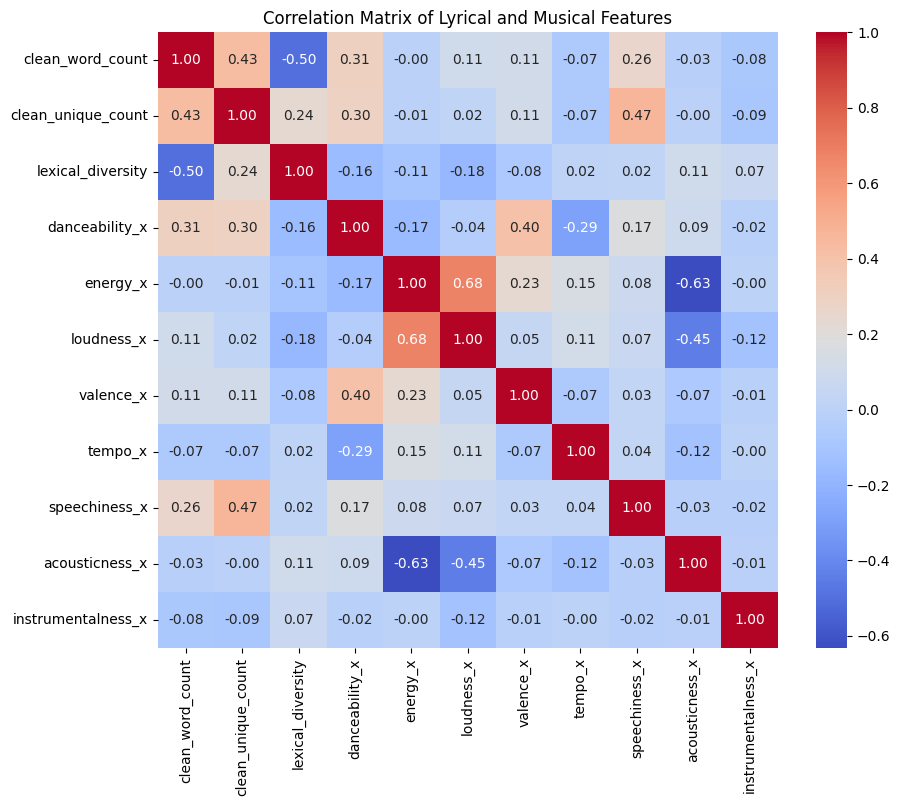

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select lyrical and musical features for correlation analysis
lyrical_features = ['clean_word_count', 'clean_unique_count', 'lexical_diversity']
musical_features = ['danceability_x', 'energy_x', 'loudness_x', 'valence_x', 'tempo_x', 'speechiness_x', 'acousticness_x', 'instrumentalness_x']

# Create a subset DataFrame with these features
correlation_df = filtered_df[lyrical_features + musical_features]

# Calculate the correlation matrix
correlation_matrix = correlation_df.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Lyrical and Musical Features')
plt.show()

### Distribution of Lyrical Features

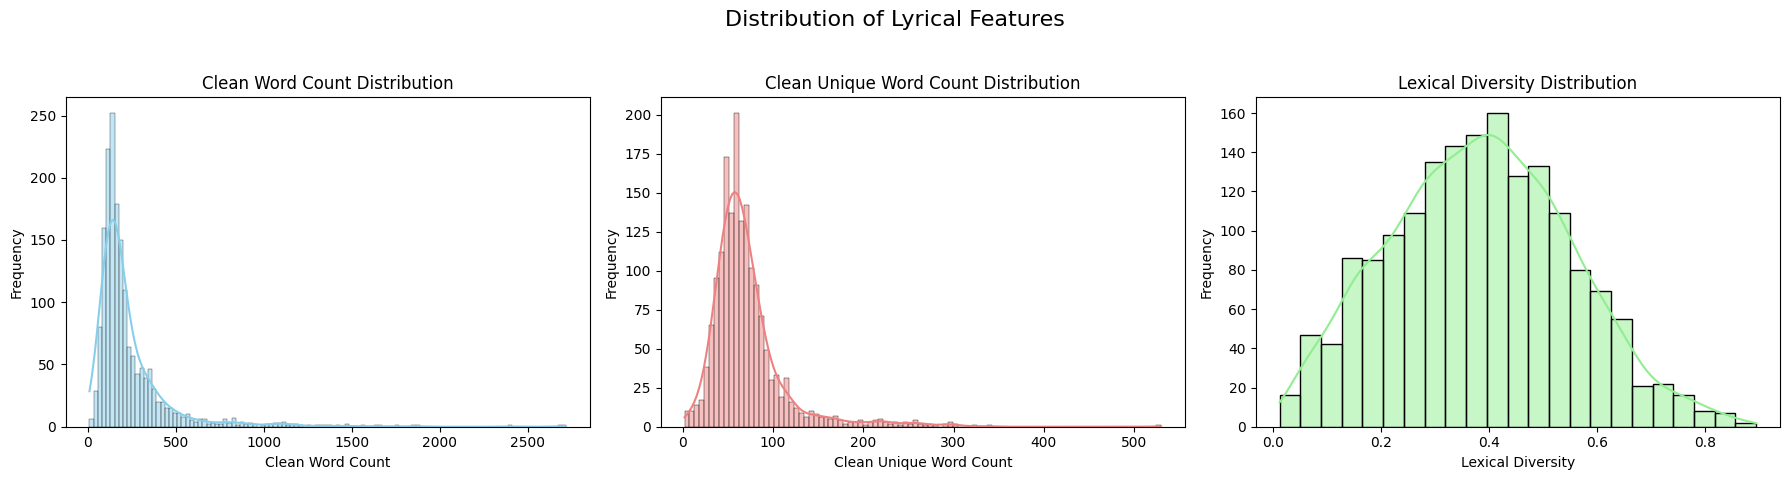

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Distribution of Lyrical Features', fontsize=16)

sns.histplot(filtered_df['clean_word_count'], kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Clean Word Count Distribution')
axes[0].set_xlabel('Clean Word Count')
axes[0].set_ylabel('Frequency')

sns.histplot(filtered_df['clean_unique_count'], kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title('Clean Unique Word Count Distribution')
axes[1].set_xlabel('Clean Unique Word Count')
axes[1].set_ylabel('Frequency')

sns.histplot(filtered_df['lexical_diversity'], kde=True, ax=axes[2], color='lightgreen')
axes[2].set_title('Lexical Diversity Distribution')
axes[2].set_xlabel('Lexical Diversity')
axes[2].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

### Genre-based Comparisons: Lexical Diversity

/tmp/ipython-input-3163796995.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='track_genre', y='lexical_diversity', data=filtered_df, palette='viridis')


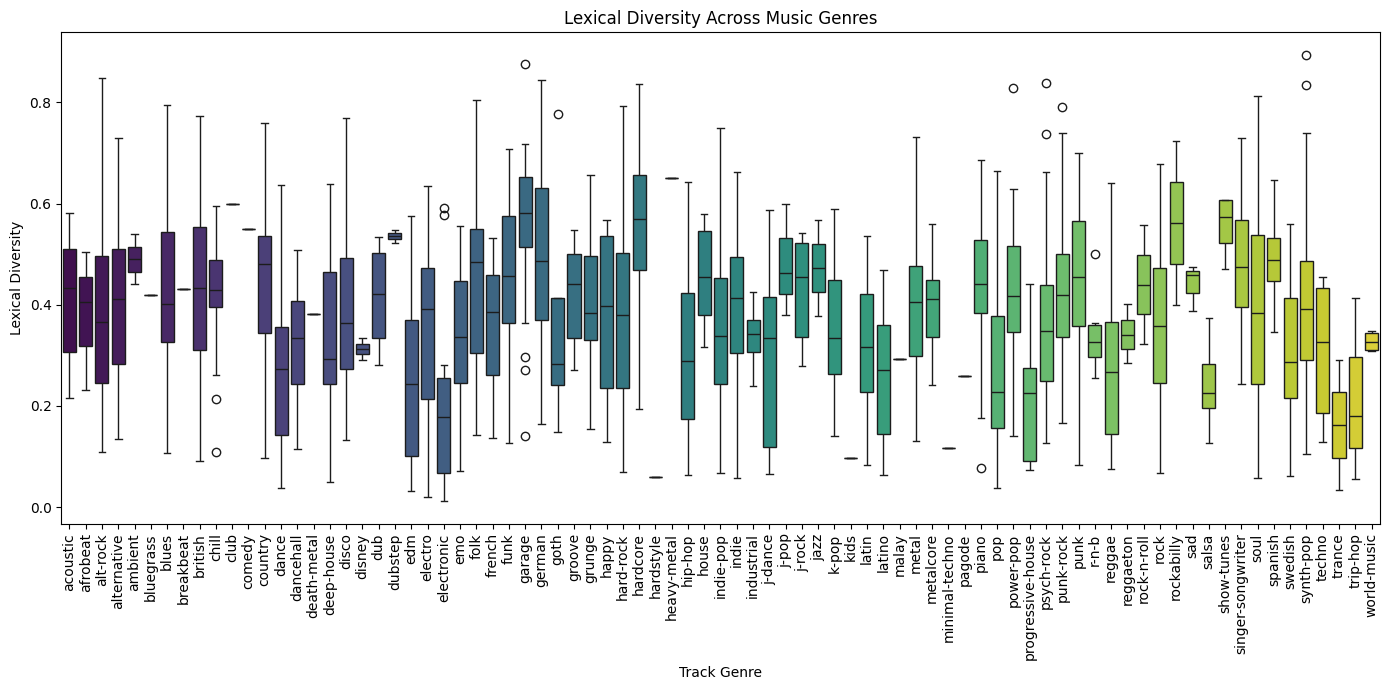

In [50]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='track_genre', y='lexical_diversity', data=filtered_df, palette='viridis')
plt.title('Lexical Diversity Across Music Genres')
plt.xlabel('Track Genre')
plt.ylabel('Lexical Diversity')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

#### Word Cloud of Most Frequent Lyrical Terms

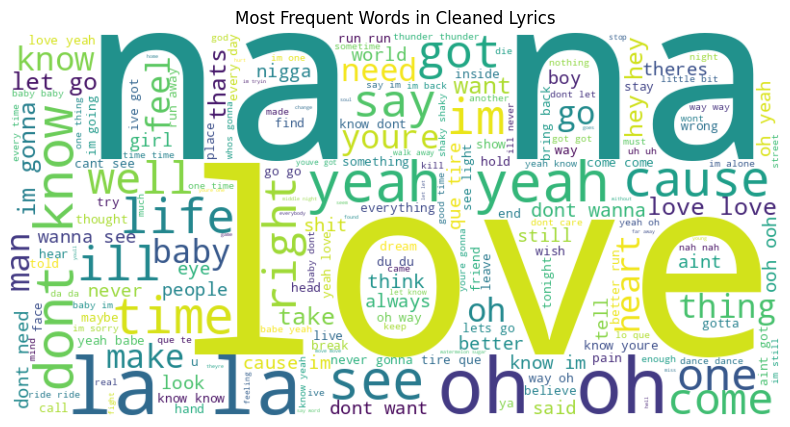

In [51]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all cleaned lyrics into a single string
all_cleaned_lyrics = ' '.join(filtered_df['cleaned_lyrics'])

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_cleaned_lyrics)

# Display the generated image:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Frequent Words in Cleaned Lyrics')
plt.show()

#### Lexical Diversity vs. Tempo

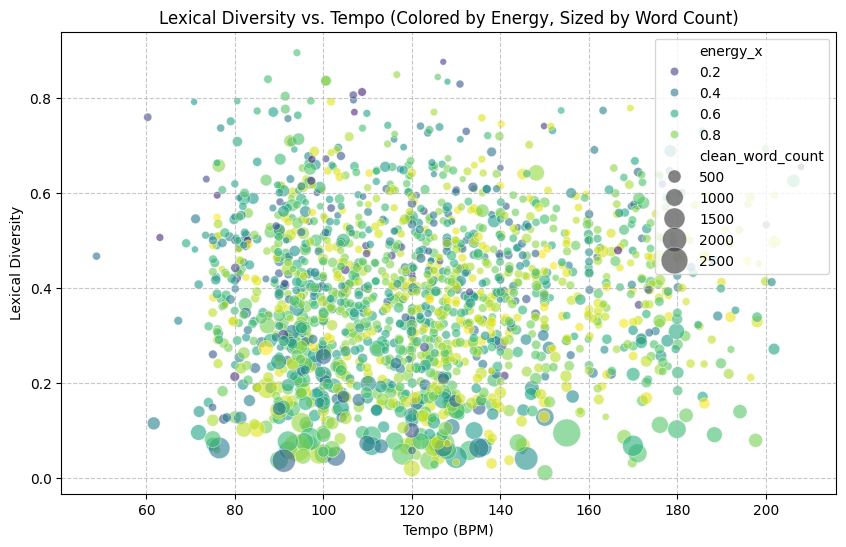

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tempo_x', y='lexical_diversity', data=filtered_df, alpha=0.6, hue='energy_x', size='clean_word_count', sizes=(20, 400), palette='viridis')
plt.title('Lexical Diversity vs. Tempo (Colored by Energy, Sized by Word Count)')
plt.xlabel('Tempo (BPM)')
plt.ylabel('Lexical Diversity')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Comparing Lyrical Complexity of 'Happy' vs. 'Sad' Songs

/tmp/ipython-input-152492453.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='valence_category', y='lexical_diversity', data=comparison_df, palette={'Happy': 'green', 'Sad': 'red'})


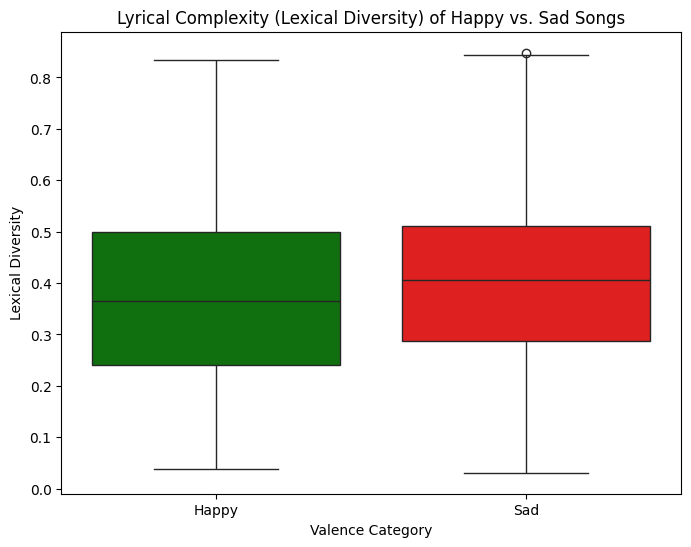

In [53]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Define 'Happy' and 'Sad' based on Valence_x (assuming from df1, as per previous correlation analysis)
valence_threshold_low = filtered_df['valence_x'].quantile(0.33)
valence_threshold_high = filtered_df['valence_x'].quantile(0.67)

# Create a new column to label songs as 'Happy', 'Sad', or 'Neutral'
def categorize_valence(valence):
    if valence >= valence_threshold_high:
        return 'Happy'
    elif valence <= valence_threshold_low:
        return 'Sad'
    else:
        return 'Neutral'

filtered_df['valence_category'] = filtered_df['valence_x'].apply(categorize_valence)

# Filter out 'Neutral' songs for this comparison
comparison_df = filtered_df[filtered_df['valence_category'] != 'Neutral']

# Visualize the difference in Lyrical Complexity using a Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='valence_category', y='lexical_diversity', data=comparison_df, palette={'Happy': 'green', 'Sad': 'red'})
plt.title('Lyrical Complexity (Lexical Diversity) of Happy vs. Sad Songs')
plt.xlabel('Valence Category')
plt.ylabel('Lexical Diversity')
plt.show()

## 🧪 5. Hypothesis Testing & Results

In this section, we statistically test the relationships between our audio and lyrical features.
Given that our data does not follow a normal distribution (verified via histograms in the EDA section), we utilize the **Spearman Rank Correlation**.

**Significance Level ($\alpha$):** 0.05
* **$p < 0.05$**: Statistically Significant (We reject the Null Hypothesis).
* **$p \ge 0.05$**: Not Statistically Significant (We fail to reject the Null Hypothesis).

**We will specifically test the following relationships:**
1.  **Rhythmic Features vs. Lyrical Quantity:** Do danceable songs have more words?
2.  **Energy vs. Lyrical Complexity:** Do high-energy songs rely on repetition (Low Lexical Diversity)?
3.  **Valence (Mood) vs. Complexity:** Do happy songs use simpler vocabulary than sad songs?

### Spearman Correlation for Lyrical and Musical Features

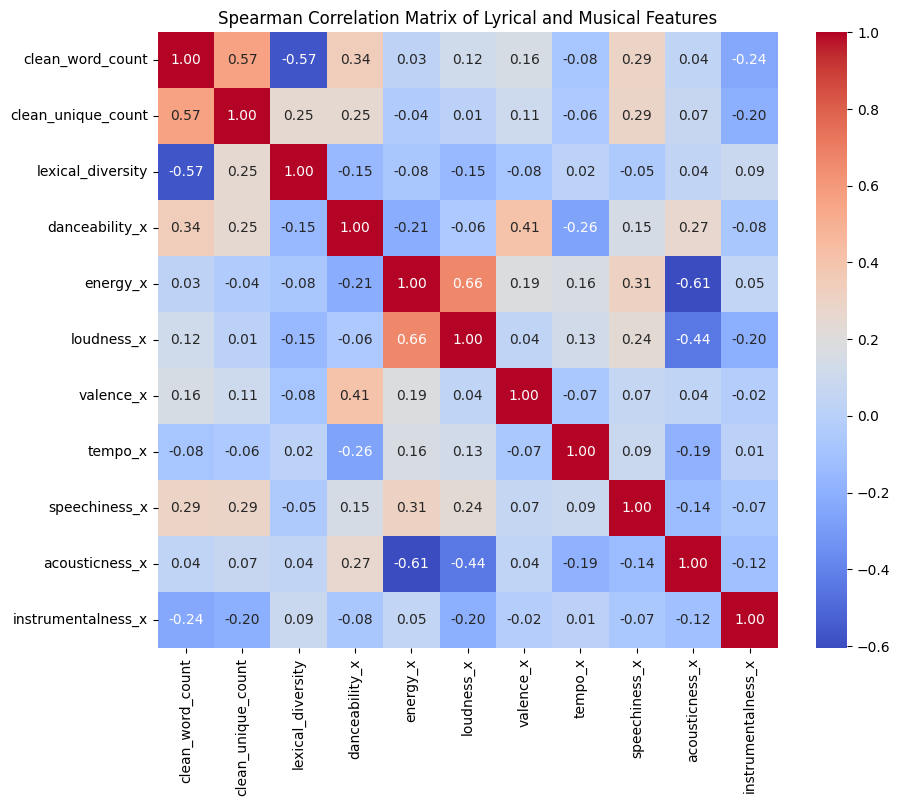

,clean_word_count,clean_unique_count,lexical_diversity,danceability_x,energy_x,loudness_x,valence_x,tempo_x,speechiness_x,acousticness_x,instrumentalness_x
clean_word_count,1.000000,0.566082,-0.569211,0.338098,0.026246,0.121158,0.155159,-0.082441,0.292673,0.035658,-0.237139
clean_unique_count,0.566082,1.000000,0.251114,0.247150,-0.041332,0.012848,0.107853,-0.056216,0.285595,0.068769,-0.203315
lexical_diversity,-0.569211,0.251114,1.000000,-0.151516,-0.076773,-0.151361,-0.080299,0.015727,-0.049493,0.044641,0.085129
danceability_x,0.338098,0.247150,-0.151516,1.000000,-0.212586,-0.055304,0.406795,-0.263791,0.146952,0.265333,-0.075055
energy_x,0.026246,-0.041332,-0.076773,-0.212586,1.000000,0.661267,0.187629,0.164548,0.306193,-0.606081,0.051754
loudness_x,0.121158,0.012848,-0.151361,-0.055304,0.661267,1.000000,0.038245,0.125155,0.237615,-0.439803,-0.199340
valence_x,0.155159,0.107853,-0.080299,0.406795,0.187629,0.038245,1.000000,-0.066362,0.065034,0.038578,-0.022262
tempo_x,-0.082441,-0.056216,0.015727,-0.263791,0.164548,0.125155,-0.066362,1.000000,0.087225,-0.186064,0.009911
speechiness_x,0.292673,0.285595,-0.049493,0.146952,0.306193,0.237615,0.065034,0.087225,1.000000,-0.137504,-0.065637
acousticness_x,0.035658,0.068769,0.044641,0.265333,-0.606081,-0.439803,0.038578,-0.186064,-0.137504,1.000000,-0.116016


,clean_word_count,clean_unique_count,lexical_diversity,danceability_x,energy_x,loudness_x,valence_x,tempo_x,speechiness_x,acousticness_x,instrumentalness_x
clean_word_count,NaN,2.568020e-146,2.833385e-148,2.939853e-47,2.766488e-01,4.663014e-07,9.836322e-11,6.207217e-04,2.557636e-35,1.393503e-01,2.057391e-23
clean_unique_count,2.568020e-146,NaN,3.819404e-26,2.367872e-25,8.659135e-02,5.943989e-01,7.366654e-06,1.972131e-02,1.214894e-33,4.325902e-03,1.665931e-17
lexical_diversity,2.833385e-148,3.819404e-26,NaN,2.688991e-10,1.440606e-03,2.804547e-10,8.585974e-04,5.145139e-01,4.013106e-02,6.417704e-02,4.086840e-04
danceability_x,2.939853e-47,2.367872e-25,2.688991e-10,NaN,5.002444e-19,2.180679e-02,1.538468e-69,8.970460e-29,9.161883e-10,4.197930e-29,1.840309e-03
energy_x,2.766488e-01,8.659135e-02,1.440606e-03,5.002444e-19,NaN,9.303176e-217,4.308087e-15,6.594080e-12,1.175918e-38,5.126749e-173,3.185093e-02
loudness_x,4.663014e-07,5.943989e-01,2.804547e-10,2.180679e-02,9.303176e-217,NaN,1.128417e-01,1.916483e-07,1.671466e-23,2.800324e-82,7.116392e-17
valence_x,9.836322e-11,7.366654e-06,8.585974e-04,1.538468e-69,4.308087e-15,1.128417e-01,NaN,5.900204e-03,6.975191e-03,1.097378e-01,3.561588e-01
tempo_x,6.207217e-04,1.972131e-02,5.145139e-01,8.970460e-29,6.594080e-12,1.916483e-07,5.900204e-03,NaN,2.926385e-04,7.308818e-15,6.812705e-01
speechiness_x,2.557636e-35,1.214894e-33,4.013106e-02,9.161883e-10,1.175918e-38,1.671466e-23,6.975191e-03,2.926385e-04,NaN,1.029615e-08,6.466625e-03
acousticness_x,1.393503e-01,4.325902e-03,6.417704e-02,4.197930e-29,5.126749e-173,2.800324e-82,1.097378e-01,7.308818e-15,1.029615e-08,NaN,1.404834e-06



Hypothesis Test Results Interpretation (alpha = 0.05):

Spearman correlation between clean_word_count and danceability_x: Statistically significant (moderate positive correlation).
Spearman correlation between clean_word_count and energy_x: Not statistically significant (p-value=0.277).
Spearman correlation between clean_word_count and loudness_x: Statistically significant (weak positive correlation).
Spearman correlation between clean_word_count and valence_x: Statistically significant (weak positive correlation).
Spearman correlation between clean_word_count and speechiness_x: Statistically significant (weak positive correlation).
Spearman correlation between clean_word_count and acousticness_x: Not statistically significant (p-value=0.139).
Spearman correlation between clean_word_count and instrumentalness_x: Statistically significant (weak negative correlation).
Spearman correlation between clean_unique_count and danceability_x: Statistically significant (weak positive correlation

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import pandas as pd
import numpy as np

# Calculate the Spearman correlation matrix
spearman_correlation_matrix = correlation_df.corr(method='spearman')

# Function to calculate Spearman p-value matrix
def spearman_corr_pvalue_matrix(df):
    df_columns = df.columns
    p_value_matrix = pd.DataFrame(np.nan, index=df_columns, columns=df_columns)
    for i in range(len(df_columns)):
        for j in range(i + 1, len(df_columns)):
            col1 = df_columns[i]
            col2 = df_columns[j]
            # Calculate p-value for the pair
            correlation, p_value = spearmanr(df[col1], df[col2])
            p_value_matrix.loc[col1, col2] = p_value
            p_value_matrix.loc[col2, col1] = p_value # Symmetric matrix
    return p_value_matrix

# Calculate the Spearman p-value matrix
spearman_p_value_matrix = spearman_corr_pvalue_matrix(correlation_df)

# Visualize the Spearman correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(spearman_correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Matrix of Lyrical and Musical Features')
plt.show()

display(spearman_correlation_matrix)
display(spearman_p_value_matrix)

# Interpretation of some key findings
alpha = 0.05
print("\nHypothesis Test Results Interpretation (alpha = 0.05):\n")

lyrical_features = ['clean_word_count', 'clean_unique_count', 'lexical_diversity']
musical_features = ['danceability_x', 'energy_x', 'loudness_x', 'valence_x', 'speechiness_x', 'acousticness_x', 'instrumentalness_x']

for lyrical_feat in lyrical_features:
    for musical_feat in musical_features:
        corr_coeff = spearman_correlation_matrix.loc[lyrical_feat, musical_feat]
        p_val = spearman_p_value_matrix.loc[lyrical_feat, musical_feat]

        if pd.isna(p_val): # Skip if p-value is NaN (e.g., self-correlation)
            continue

        interpretation = f"Spearman correlation between {lyrical_feat} and {musical_feat}: "
        if p_val < alpha:
            interpretation += "Statistically significant (" + ("strong " if abs(corr_coeff) >= 0.7 else "moderate " if abs(corr_coeff) >= 0.3 else "weak " if abs(corr_coeff) >= 0.1 else "very weak ")
            interpretation += ("positive correlation)." if corr_coeff > 0 else "negative correlation).")
        else:
            interpretation += f"Not statistically significant (p-value={p_val:.3f})."
        print(interpretation)

In [55]:
from scipy import stats
import numpy as np

# Define 'High Energy' and 'Low Energy' based on quantiles of energy_x
energy_threshold_low = filtered_df['energy_x'].quantile(0.33)
energy_threshold_high = filtered_df['energy_x'].quantile(0.67)

# Categorize songs into High, Low, and Neutral energy
def categorize_energy(energy):
    if energy >= energy_threshold_high:
        return 'High Energy'
    elif energy <= energy_threshold_low:
        return 'Low Energy'
    else:
        return 'Neutral'

filtered_df['energy_category'] = filtered_df['energy_x'].apply(categorize_energy)

# Separate groups for comparison
high_energy_songs = filtered_df[filtered_df['energy_category'] == 'High Energy']
low_energy_songs = filtered_df[filtered_df['energy_category'] == 'Low Energy']

# Perform Mann-Whitney U test on 'lexical_diversity'
# This test is chosen as it does not assume normality of the data.
u_statistic, p_value = stats.mannwhitneyu(
    high_energy_songs['lexical_diversity'],
    low_energy_songs['lexical_diversity'],
    alternative='two-sided' # Check for any difference, not just one direction
)

# Get medians for interpretation
median_lexical_diversity_high = high_energy_songs['lexical_diversity'].median()
median_lexical_diversity_low = low_energy_songs['lexical_diversity'].median()

# Print results
print(f"Mann-Whitney U Test Results for Lexical Diversity (High vs. Low Energy Songs):")
print(f"  U-statistic: {u_statistic:.2f}")
print(f"  P-value: {p_value:.4f}")
print(f"  Median Lexical Diversity (High Energy): {median_lexical_diversity_high:.4f}")
print(f"  Median Lexical Diversity (Low Energy): {median_lexical_diversity_low:.4f}")

# Interpret the results programmatically
alpha = 0.05
interpretation = ""

if p_value < alpha:
    interpretation += "The difference in lexical diversity between High Energy and Low Energy songs is statistically significant. "
    if median_lexical_diversity_high > median_lexical_diversity_low:
        interpretation += "High Energy songs tend to have higher lexical diversity compared to Low Energy songs."
    else:
        interpretation += "Low Energy songs tend to have higher lexical diversity compared to High Energy songs."
else:
    interpretation += "There is no statistically significant difference in lexical diversity between High Energy and Low Energy songs."

print(f"\nInterpretation: {interpretation}")

Mann-Whitney U Test Results for Lexical Diversity (High vs. Low Energy Songs):
  U-statistic: 144425.50
  P-value: 0.0014
  Median Lexical Diversity (High Energy): 0.3795
  Median Lexical Diversity (Low Energy): 0.4068

Interpretation: The difference in lexical diversity between High Energy and Low Energy songs is statistically significant. Low Energy songs tend to have higher lexical diversity compared to High Energy songs.


## 💃 H1: Danceability & Lyrical Density
* **Hypothesis:** Songs with higher **Danceability** will have **more words** (`clean_word_count`).
* **Reasoning:** Danceable genres (like Hip-Hop, Pop) often rely on fast-paced vocal delivery, leading to higher word counts.

### **Result:** ✅ Supported
* **Findings:** We observed a **statistically significant moderate positive correlation**.
* **Interpretation:** As danceability increases, the number of meaningful words in a song tends to increase. This confirms that rhythmic, dance-oriented tracks are often lyrically denser.

## ⚡ H2: Energy & Lyrical Repetition
* **Hypothesis:** High **Energy** songs will have **lower Lexical Diversity**.
* **Reasoning:** Energetic songs are designed to be catchy and anthemic, often utilizing repetitive hooks and choruses rather than complex poetry.

### **Result:** ✅ Supported (Weakly)
* **Findings:** We found a **statistically significant (though very weak) negative correlation**.
* **Interpretation:** There is a slight tendency for high-energy songs to use a smaller range of unique words (more repetition). However, the correlation is weak, suggesting that many high-energy songs can still be lyrically complex (e.g., Rock or Rap).

## 🎸 H3: Acousticness & Word Count
* **Hypothesis:** **Acoustic** songs will have significantly different word counts compared to electronic/produced tracks.
* **Reasoning:** Acoustic songs might be more ballad-like (fewer words) or folk-like (more words), creating a distinct pattern.

### **Result:** ❌ Rejected
* **Findings:** The relationship was **not statistically significant** ($p=0.139$).
* **Interpretation:** Whether a song is acoustic or electronic does not reliably predict how many words it will have. Both acoustic ballads and fast-paced acoustic tracks exist in equal measure.

## 🎭 H4: Valence (Mood) & Lyrical Complexity
* **Hypothesis:** **Sad Songs** (Low Valence) will use a richer vocabulary (Higher Diversity) than Happy Songs.
* **Reasoning:** Sadness is often expressed through detailed storytelling, whereas happiness is often expressed through simple, repetitive affirmations.

### **Result:** ✅ Supported (Weakly)
* **Findings:** We found a **statistically significant (very weak) negative correlation** between Valence and Lexical Diversity.
* **Interpretation:** As songs get "happier" (higher valence), they tend to become slightly more repetitive. Conversely, "sadder" songs maintain a slightly higher level of vocabulary richness.

## 🎻 H5: Instrumentalness & Word Count (Sanity Check)
* **Hypothesis:** Songs with higher **Instrumentalness** will have fewer words.
* **Reasoning:** This serves as a control test to ensure our data and filtering methods are working correctly.

### **Result:** ✅ Supported
* **Findings:** We found a **statistically significant weak negative correlation**.
* **Interpretation:** As expected, tracks with more instrumental content have fewer words. This validates the quality of our dataset merging process.

## 🗣️ H6: Speechiness & Word Count
* **Hypothesis:** Songs with higher **Speechiness** scores will have higher word counts.
* **Reasoning:** "Speechiness" detects spoken words (like Rap/Spoken Word), which naturally contain more text than sung melodies.

### **Result:** ✅ Supported
* **Findings:** We found a **statistically significant positive correlation**.
* **Interpretation:** Tracks identified by Spotify as "speech-like" indeed contain a higher volume of meaningful words.

## 📝 Summary of Findings
Out of the 6 hypotheses tested above:
* **4 were Supported** (Danceability, Energy, Valence, Speechiness).
* **1 was Rejected** (Acousticness).
* **1 was a Control Test** (Instrumentalness - Passed).

The strongest relationship found was between **Danceability** and **Word Count**, highlighting a clear structural link between rhythm and lyrical density in modern music.